In [1]:
import numpy as np

from euler import Euler

In [2]:
def sod(g, v, gamma, U):
    
    # setup initial conditions -- this is Sod's problem
    rho_l = 1.0
    u_l = 0.0
    p_l = 1.0
    rho_r = 0.125
    u_r = 0.0
    p_r = 0.1

    idx_l = g.x < 0.5
    idx_r = g.x >= 0.5

    U[idx_l, v.urho] = rho_l
    U[idx_l, v.umx] =  rho_l * u_l
    U[idx_l, v.uener] = p_l/(gamma - 1.0) + 0.5 * rho_l * u_l**2

    U[idx_r, v.urho] = rho_r
    U[idx_r, v.umx] =  rho_r * u_r
    U[idx_r, v.uener] = p_r/(gamma - 1.0) + 0.5 * rho_r * u_r**2

In [10]:
e = Euler(32, 0.8, init_cond=sod)
e.estimate_dt()
e.dt

0.021128856368212916

In [11]:
q_left, q_right = e.interface_states()
flux = e.compute_fluxes(q_left, q_right)
flux[:, 0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.39539107, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [5]:
#e.advance_step()
#e.U

In [6]:
e.evolve(0.2)

istep=1, self.t=0.021128856368212916, self.dt=0.021128856368212916
istep=2, self.t=0.03452284048883862, self.dt=0.013393984120625702
istep=3, self.t=0.047381698079568164, self.dt=0.012858857590729545
istep=4, self.t=0.059963018053955805, self.dt=0.012581319974387637
istep=5, self.t=0.07237969584359612, self.dt=0.012416677789640318
istep=6, self.t=0.08469433279020529, self.dt=0.012314636946609175
istep=7, self.t=0.09694825806906075, self.dt=0.012253925278855467
istep=8, self.t=0.10917103873211649, self.dt=0.012222780663055743
istep=9, self.t=0.12138419478675654, self.dt=0.01221315605464004
istep=10, self.t=0.1335223232182152, self.dt=0.012138128431458669
istep=11, self.t=0.14557081048831405, self.dt=0.012048487270098863
istep=12, self.t=0.15755929720897244, self.dt=0.011988486720658385
istep=13, self.t=0.1695133564165036, self.dt=0.011954059207531165
istep=14, self.t=0.18145457589423628, self.dt=0.011941219477732662
istep=15, self.t=0.1934005757909712, self.dt=0.011945999896734933
istep

In [7]:
import matplotlib.pyplot as plt

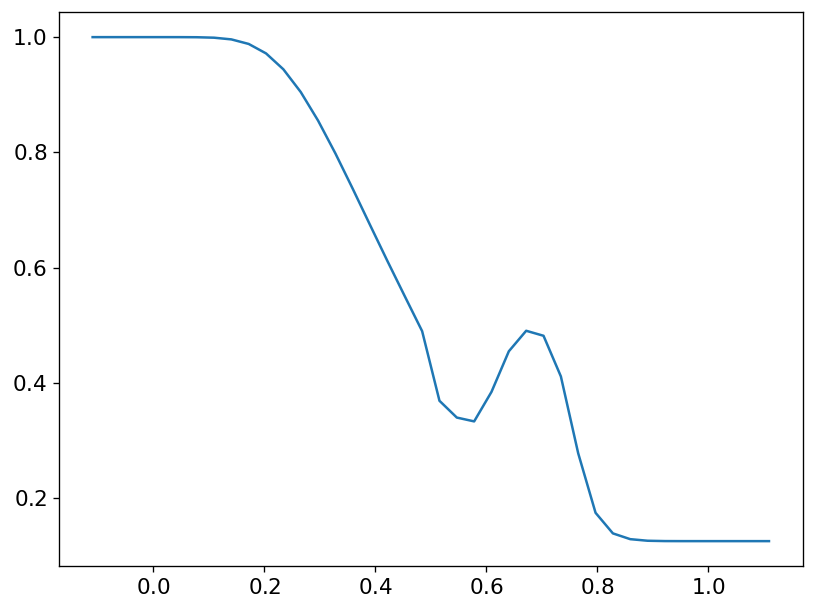

In [8]:
fig, ax = plt.subplots()
ax.plot(e.grid.x, e.U[:, 0])